In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

import tensorflow as tf
tf.random.set_seed(3)

from tensorflow import keras
from keras.datasets import mnist

from tensorflow.math import confusion_matrix


In [73]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [74]:
print(x_train.shape,
y_train.shape,
x_test.shape,
y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


6


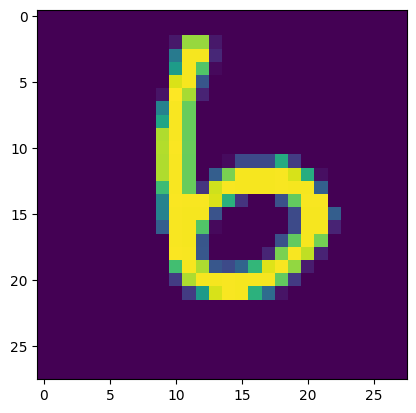

In [75]:
plt.imshow(x_train[534])
print(y_train[534])

In [76]:
np.unique(y_train)
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [77]:
#scaling
x_train = x_train/255
x_test = x_test/255

In [78]:
print(x_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [79]:
#building the nn

model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [81]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8676 - loss: 0.4574
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9654 - loss: 0.1178
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9757 - loss: 0.0787
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9828 - loss: 0.0567
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9868 - loss: 0.0427
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9897 - loss: 0.0335
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0282
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0251
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9931 - loss: 0.0222
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9932 - loss: 0.0202


In [82]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9690 - loss: 0.1328


In [83]:
print(x_test.shape)

(10000, 28, 28)


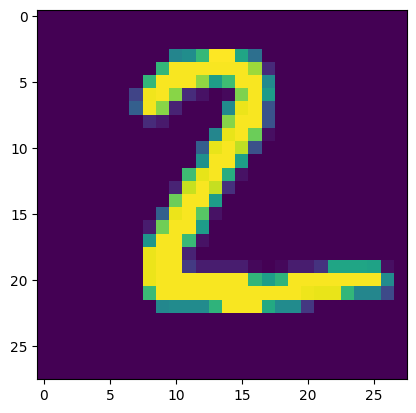

In [174]:
plt.imshow(x_test[1])

In [94]:
print(y_test[1])

2


In [91]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [92]:
print(y_pred[1])

[5.14886356e-09 8.18406165e-01 1.00000000e+00 9.69676852e-01
 6.03906031e-15 8.09017365e-06 5.95946137e-09 1.33657630e-03
 1.35312695e-02 2.58073727e-14]


In [93]:
print(np.argmax(y_pred[1]))

2


In [95]:
lis = [np.argmax(i) for i in y_pred]
print(lis)


[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [96]:
cm = confusion_matrix(y_test,lis)
print(cm)

tf.Tensor(
[[ 966    0    0    0    0    0    5    1    2    6]
 [   2 1109    1    3    3    1    6    1    9    0]
 [   6    1 1003    8    0    0    3    3    7    1]
 [   0    0    2  986    0    3    0    4    4   11]
 [   0    0    3    0  937    0    8    4    2   28]
 [   1    0    0   10    1  861    9    1    5    4]
 [   4    2    1    1    2    3  944    0    1    0]
 [   1    0   12    2    0    0    0  991    3   19]
 [   3    0    3    5    4    8    4    1  938    8]
 [   1    2    0    3    4    2    1    3    0  993]], shape=(10, 10), dtype=int32)


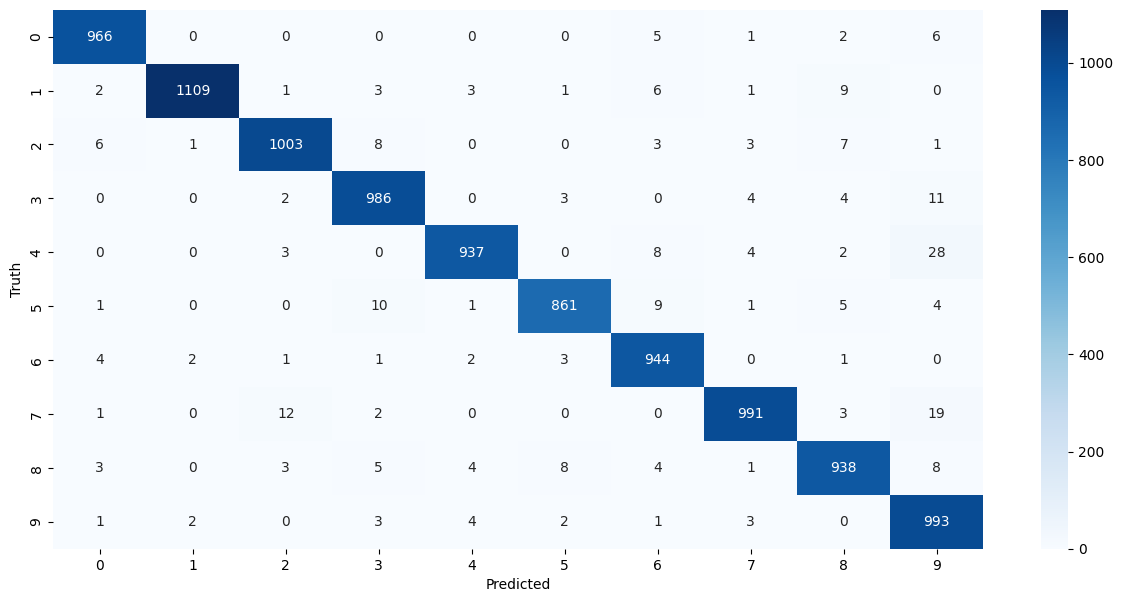

In [99]:
plt.figure(figsize=(15,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [162]:
img = plt.imread('/content/mnist_data_10_0.png')

In [171]:
img.shape

(258, 262, 4)

In [175]:
imgg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
imgr = cv2.resize(imgg, (28, 28))
imgr = 255 - imgr  # Invert if needed
imgresized = imgr / 255.0
img3 = np.reshape(imgresized, (1, 28, 28))

TypeError: Invalid shape (1, 28, 28) for image data

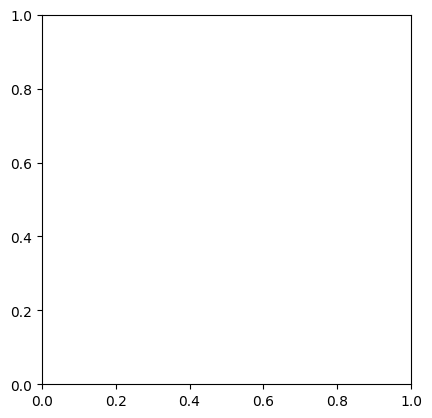

In [176]:
plt.imshow(img3)

In [177]:
preded = model.predict(img3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [178]:
print(preded)

[[5.6202470e-11 3.0179195e-09 3.9694614e-10 1.0000000e+00 3.9156798e-32
  1.0000000e+00 4.1099191e-01 9.9992585e-01 1.0816402e-02 1.1861389e-16]]


In [179]:
print(np.argmax(preded))

3
